<a href="https://colab.research.google.com/github/alouwyck/vives-intro-to-ai/blob/main/topic4/topic4_blind_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

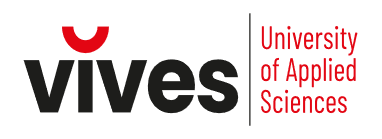<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
VIVES BUSINESS ACADEMY<br>
Academic Year 2023-2024<br>
Andy Louwyck

---



---



# **BLIND SEARCH**

This notebook demonstrates how to apply **depth-first search** (DFS) and **breadth-first search** (BFS) to solve the problem of **finding a path**. These algorithms blindly traverse the search tree without using any "intelligence"; hence, the name **blind search**. This also explains why these algorithms are also not considered as artificial intelligence. The use of more advanced search algorithms will be covered in the next topics.

## `SearchExerciser`

To illustrate the basic concepts discussed in the topics about search algorithms, we will use the `SearchExerciser` package developed by Stefaan Haspeslagh and Andy Louwyck at Vives University of Applied Sciences. The package can be downloaded or cloned from the following GitHub repository: https://github.com/alouwyck/SearchExerciser.

To clone the repository, we execute the statements in the cell below. Note that [Google Colab](https://colab.research.google.com/) is used as environment to run the notebooks, although this is not required.

In [ ]:
import os, shutil

# remove directory 'SearchExerciser' first if it already exists
path = "SearchExerciser"
if os.path.exists(path):
    shutil.rmtree(path)

# clone SearchExerciser repository from Github
!git clone https://github.com/alouwyck/SearchExerciser

# put SearchExerciser package directory in the current working directory
os.rename(path, 'temp')
shutil.copytree(os.path.join('temp', path), path);
shutil.rmtree('temp')

Cloning into 'SearchExerciser'...
remote: Enumerating objects: 281, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 281 (delta 20), reused 25 (delta 12), pack-reused 248
Receiving objects: 100% (281/281), 349.00 KiB | 17.45 MiB/s, done.
Resolving deltas: 100% (168/168), done.


Once the package is cloned into our environment, we import the following classes:

In [ ]:
from SearchExerciser.graph import Graph, ProductionRule
from SearchExerciser.maze import Maze, Down, Up, Right, Left
from SearchExerciser.search.blind import DFS, BFS

The meaning and the purpose of these classes will be explained in the sections below.

## The running example

Using class `Graph` from `SearchExerciser` module `graph`, it is very easy to implement the **graph** used as running example throughout the slides of topic 4. As we known, a graph consists of **nodes** (or vertices) that can be connected through **edges** (or arcs).

Just like the `Maze` class, the `Graph` class has a static method `create` that is used to create a `Graph` object. Of course, we need to define the nodes and edges, which is done by passing a list of edges, where each edge is defined by a pair of nodes, represented by a Python tuple. The name of the nodes are Python strings.

The `Graph` object created in the cell below defines the graph from the running example:

In [ ]:
graph = Graph.create(edges=[("S", "A"), ("S", "D"), ("A", "D"), ("A", "B"), ("D", "E"),
                            ("B", "E"), ("B", "C"), ("E", "F"), ("F", "G")])

Calling method `plot` on object `graph` visualizes the graph:

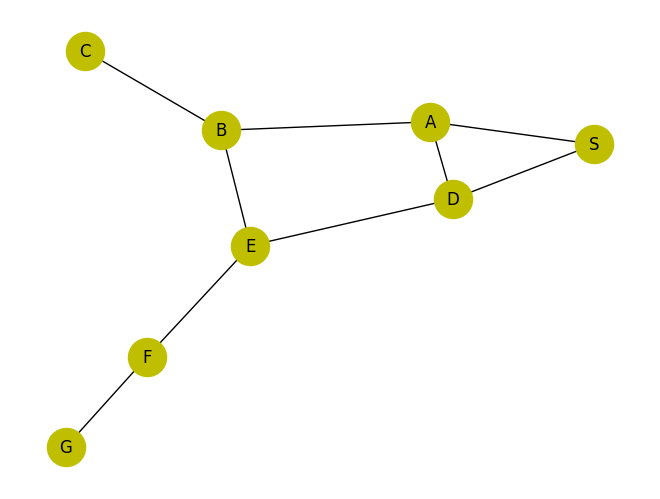

In [ ]:
graph.plot()

If we want the graph to look the same way as in the slides, then we need to pass the coordinates of the nodes. This is done using a Python dictionary, where the keys represent the name of the nodes and the values are the corresponding (x,y) coordinates defined as a two-element list or tuple:

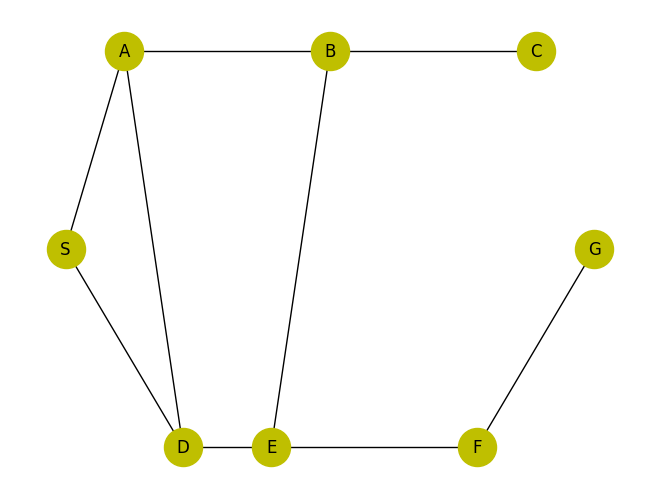

In [ ]:
coordinates = dict(S=[0, 0.5],
                   A=[1, 1],
                   D=[2, 0],
                   E=[3.5, 0],
                   B=[4.5, 1],
                   F=[7, 0],
                   C=[8, 1],
                   G=[9, 0.5])
graph.plot(coordinates)

That looks familiar indeed!

By default, the start node is `'S'`, and the goal node `'G'`:

In [ ]:
print('start:', graph.start)
print('goal:', graph.goal)

start: S
goal: G


The nodes are stored in attribute `vertices`:

In [ ]:
graph.vertices

NodeView(('B', 'E', 'F', 'C', 'A', 'D', 'G', 'S'))

The edges in attribute `edges`:

In [ ]:
graph.edges

EdgeView([('B', 'A'), ('B', 'E'), ('B', 'C'), ('E', 'D'), ('E', 'F'), ('F', 'G'), ('A', 'S'), ('A', 'D'), ('D', 'S')])

These `NodeView` and `EdgeView` objects are datatypes that are used in Python package [networkx](https://networkx.org/). The `Graph` class actually is a wrapper around the networkx' `Graph` class:

In [ ]:
graph.graph

## Depth-first search

To apply a search algorithm in order to find a path from start node `'S'` to goal node `'G'`, we simply invoke method `search` on the `Graph` object and pass the class of the algorithm we want to use. In this case, we want to apply depth-first search, so we pass class `DFS`:

In [ ]:
path = graph.search(DFS)  # DFS is the class implementing depth-first search
print('Path found:', path)

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.0013539791107177734 seconds
Number of iterations: 7
Maximum length of queue: 4
Path found: SABEFG


We see that DFS has succesfully found the path `SABEFG`. Why has it found this specific path? First, we need to check the production rules, in this case, the order in which the nodes are selected:

In [ ]:
graph.rules

[A, B, C, D, E, F, G, S]

It is clear that the nodes are sorted alphabetically. Suppose we want to reverse the order, then we can use static method `create_all` from class `ProductionRule`:

In [ ]:
graph.rules = ProductionRule.create_all(graph, reverse=True)  # set reverse to True to sort in descending order
graph.rules

[S, G, F, E, D, C, B, A]

Let's search again applying these new rules:

In [ ]:
graph.search(DFS)

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.002025127410888672 seconds
Number of iterations: 4
Maximum length of queue: 4


SDEFG

This gives a different path indeed. Do you understand why? In trying to understand how the algorithm works, it may be useful to print the queue for each iteration, in a similar way as is done in the slides:

In [ ]:
path = graph.search(DFS, print_queue=True)  # set print_queue to True
print('Path found:', path)

Initial queue:
[S]

Iteration 1
Path removed from queue:
S
New paths:
[SD,SA]
Paths in queue:
[SD,SA]

Iteration 2
Path removed from queue:
SD
New paths:
[SDE,SDA]
Paths in queue:
[SDE,SDA,SA]

Iteration 3
Path removed from queue:
SDE
New paths:
[SDEF,SDEB]
Paths in queue:
[SDEF,SDEB,SDA,SA]

Iteration 4
Path removed from queue:
SDEF
New paths:
[SDEFG]
Paths in queue:
[SDEFG,SDEB,SDA,SA]

Path to goal found in new paths:
SDEFG

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.001588582992553711 seconds
Number of iterations: 4
Maximum length of queue: 4
Path found: SDEFG


We see that the algorithm indeed selects the nodes in descending alphabetical order. We also see that the algorithm applies the **last in first out** (LIFO) principle: the new paths that are last added to the queue are removed first!

Resetting the `rules` to the default ascending alphabetical order:

In [ ]:
graph.rules = ProductionRule.create_all(graph)  # default is ascending alphabetical order
graph.rules

[A, B, C, D, E, F, G, S]

Searching again while displaying the intermediate queues:

In [ ]:
path = graph.search(DFS, print_queue=True)
print('Path found:', path)

Initial queue:
[S]

Iteration 1
Path removed from queue:
S
New paths:
[SA,SD]
Paths in queue:
[SA,SD]

Iteration 2
Path removed from queue:
SA
New paths:
[SAB,SAD]
Paths in queue:
[SAB,SAD,SD]

Iteration 3
Path removed from queue:
SAB
New paths:
[SABC,SABE]
Paths in queue:
[SABC,SABE,SAD,SD]

Iteration 4
Path removed from queue:
SABC
New paths:
[]
Paths in queue:
[SABE,SAD,SD]

Iteration 5
Path removed from queue:
SABE
New paths:
[SABED,SABEF]
Paths in queue:
[SABED,SABEF,SAD,SD]

Iteration 6
Path removed from queue:
SABED
New paths:
[]
Paths in queue:
[SABEF,SAD,SD]

Iteration 7
Path removed from queue:
SABEF
New paths:
[SABEFG]
Paths in queue:
[SABEFG,SAD,SD]

Path to goal found in new paths:
SABEFG

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.005633831024169922 seconds
Number of iterations: 7
Maximum length of queue: 4
Path found: SABEFG


This result is exactly the same as for the DFS example discussed in the slides!

## Breadth-first search

If we want to apply breadth-first search, then we need to pass class `BFS` to method `search`:

In [ ]:
path = graph.search(BFS)  # class BFS implements breadth-first search
print('Path found:', path)

ALGORITHM: Breadth-first search
RESULT: SUCCES
Elapsed time: 0.0017497539520263672 seconds
Number of iterations: 13
Maximum length of queue: 9
Path found: SDEFG


Nice! BFS finds the **shortest path**, which has the minimum number of nodes! Is that always the case? Yes! Next topic will explain why!

Re-running the algorithm and this time printing the intermediate queues gives us the entire solution (from which the slides only show the first steps and the final step):

In [ ]:
path = graph.search(BFS, print_queue=True)
print('Path found:', path)

Initial queue:
[S]

Iteration 1
Path removed from queue:
S
New paths:
[SA,SD]
Paths in queue:
[SA,SD]

Iteration 2
Path removed from queue:
SA
New paths:
[SAB,SAD]
Paths in queue:
[SD,SAB,SAD]

Iteration 3
Path removed from queue:
SD
New paths:
[SDA,SDE]
Paths in queue:
[SAB,SAD,SDA,SDE]

Iteration 4
Path removed from queue:
SAB
New paths:
[SABC,SABE]
Paths in queue:
[SAD,SDA,SDE,SABC,SABE]

Iteration 5
Path removed from queue:
SAD
New paths:
[SADE]
Paths in queue:
[SDA,SDE,SABC,SABE,SADE]

Iteration 6
Path removed from queue:
SDA
New paths:
[SDAB]
Paths in queue:
[SDE,SABC,SABE,SADE,SDAB]

Iteration 7
Path removed from queue:
SDE
New paths:
[SDEB,SDEF]
Paths in queue:
[SABC,SABE,SADE,SDAB,SDEB,SDEF]

Iteration 8
Path removed from queue:
SABC
New paths:
[]
Paths in queue:
[SABE,SADE,SDAB,SDEB,SDEF]

Iteration 9
Path removed from queue:
SABE
New paths:
[SABED,SABEF]
Paths in queue:
[SADE,SDAB,SDEB,SDEF,SABED,SABEF]

Iteration 10
Path removed from queue:
SADE
New paths:
[SADEB,SADEF]
Pat

What we see here is that BFS applies the principle of **first in first out** (FIFO): the paths that are removed first from the queue were added first!

If you are not convinced that BFS always finds the shortest path, just do the test! Shuffle the nodes in `rules `randomly, re-run BFS, and you'll see!

In [ ]:
from random import shuffle

shuffle(graph.rules)  # shuffle list randomly
graph.rules

[E, B, G, D, S, F, C, A]

In [ ]:
path = graph.search(BFS)
print('Path found:', path)

ALGORITHM: Breadth-first search
RESULT: SUCCES
Elapsed time: 0.0014102458953857422 seconds
Number of iterations: 9
Maximum length of queue: 7
Path found: SDEFG


## Maze

Of course DFS and BFS can also be applied to find a path in a maze! Let's try this out on the simple 3x3 maze we've been using to explain the concepts of the state space representation:

In [ ]:
maze = Maze.create(["*..",
                    ".#.",
                    "..o"])
maze

*..
.#.
..o

Recall that the maze is visualized calling method `plot`:

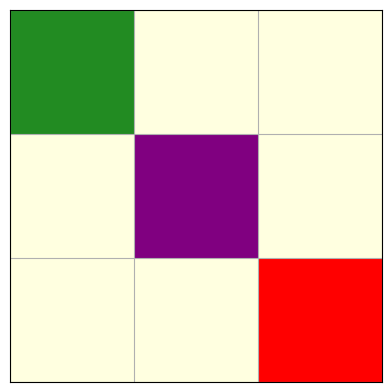

In [ ]:
maze.plot()

Like class `Graph`, class `Maze` also has a `search` method (which they both inherit from a common superclass):

In [ ]:
path = maze.search(DFS, print_queue=True)

Initial queue:
x..  
.#.  
..o  

Iteration 1
Path removed from queue:
x..
.#.
..o
New paths:
xx.  x..  
.#.  x#.  
..o  ..o  
Paths in queue:
xx.  x..  
.#.  x#.  
..o  ..o  

Iteration 2
Path removed from queue:
xx.
.#.
..o
New paths:
xxx  
.#.  
..o  
Paths in queue:
xxx  x..  
.#.  x#.  
..o  ..o  

Iteration 3
Path removed from queue:
xxx
.#.
..o
New paths:
xxx  
.#x  
..o  
Paths in queue:
xxx  x..  
.#x  x#.  
..o  ..o  

Iteration 4
Path removed from queue:
xxx
.#x
..o
New paths:
xxx  
.#x  
..x  
Paths in queue:
xxx  x..  
.#x  x#.  
..x  ..o  

Path to goal found in new paths:
xxx
.#x
..x

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.01858353614807129 seconds
Number of iterations: 4
Maximum length of queue: 2


Recall that we can visualize the maze and the found path by calling method `plot` on the `Path` object:

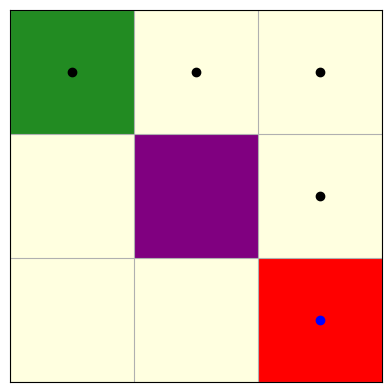

In [ ]:
path.plot()

Does BFS find the same path? Or will it choose the path that first goes down?

ALGORITHM: Breadth-first search
RESULT: SUCCES
Elapsed time: 0.002200603485107422 seconds
Number of iterations: 6
Maximum length of queue: 2


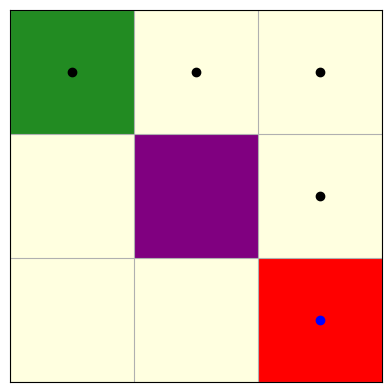

In [ ]:
maze.search(BFS).plot()

It finds the same path! Check the intermediate results to understand why!

Suppose now that we want to find the other path going down first, then we need to change the production rules. Recall that these `rules` are the conventional "left, right, up, down" by default:

In [ ]:
maze.rules  # Left, Right, Up, Down by convention!

[L, R, U, D]

Changing these `rules` and setting `Up()` in front will do the job:

ALGORITHM: Breadth-first search
RESULT: SUCCES
Elapsed time: 0.0020334720611572266 seconds
Number of iterations: 6
Maximum length of queue: 2


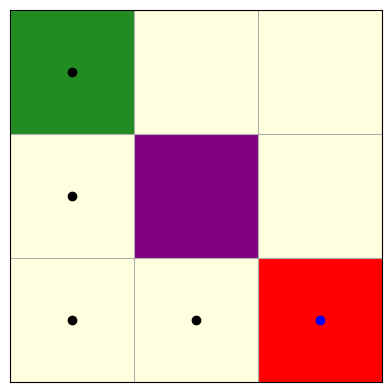

In [ ]:
maze.rules = [Down(), Right(), Up(), Left()]  # contains instances, not classes!
maze.search(BFS).plot()

Of course the same path is found applying DFS:

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.0008156299591064453 seconds
Number of iterations: 4
Maximum length of queue: 2


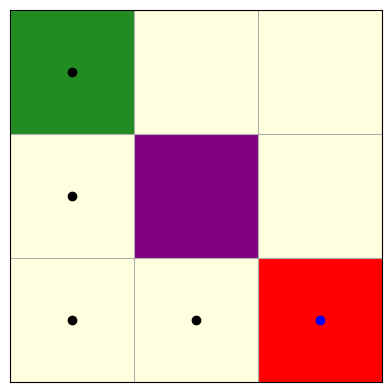

In [ ]:
maze.search(DFS).plot()

## Exercise

Recall that we can create a random maze using static method `create_random` of the `Maze` class:

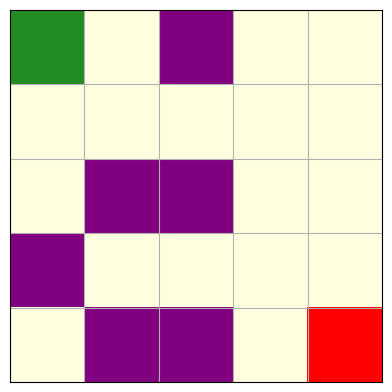

In [ ]:
maze = Maze.create_random(size=5,         # number of rows = number of columns
                          num_of_walls=6, # number of 'forbidden' barriers or walls
                          seed=0)         # random seed
maze.plot()

Try to predict the path that DFS and BFS will find for this maze applying the convential production rules.

Check your solution using method `maze.search`...

---